In [52]:
import DynaMaze
import importlib
importlib.reload(DynaMaze)
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# Initialize Maze
maze = DynaMaze.Maze(width=9, 
                     height=6,
                     source=DynaMaze.MazeState(x=3, y=0),
                     dest=DynaMaze.MazeState(x=8, y=5))
maze.add_blocked_state(DynaMaze.MazeState(x=1, y=2))
maze.add_blocked_state(DynaMaze.MazeState(x=2, y=2))
maze.add_blocked_state(DynaMaze.MazeState(x=3, y=2))
maze.add_blocked_state(DynaMaze.MazeState(x=4, y=2))
maze.add_blocked_state(DynaMaze.MazeState(x=5, y=2))
maze.add_blocked_state(DynaMaze.MazeState(x=6, y=2))
maze.add_blocked_state(DynaMaze.MazeState(x=7, y=2))
maze.add_blocked_state(DynaMaze.MazeState(x=8, y=2))
# Initialize dyna algorithm
dyna_q_algorithm = DynaMaze.DynaQAlgorithm(world=maze, 
                                           num_sim_per_real_action=10, 
                                           greedy_epsilon=0.1,
                                           gamma=0.9,
                                           alpha=0.5)


acc_reward = np.zeros((3000))
num_instance = 50

for _ in range(num_instance):
    dyna_q_algorithm.reset()
    maze.add_blocked_state(DynaMaze.MazeState(x=0, y=2))
    maze.remove_blocked_state(DynaMaze.MazeState(x=8, y=2))
    # Run first 1000 slots 
    for index in range(1000):
        dyna_q_algorithm.run()
        acc_reward[index] = acc_reward[index] + dyna_q_algorithm.get_acc_reward()

    maze.remove_blocked_state(DynaMaze.MazeState(x=0, y=2))
    maze.add_blocked_state(DynaMaze.MazeState(x=8, y=2))

    for index in range(1000, 3000):
        dyna_q_algorithm.run()
        acc_reward[index] = acc_reward[index] + dyna_q_algorithm.get_acc_reward()
    
acc_reward = acc_reward/num_instances

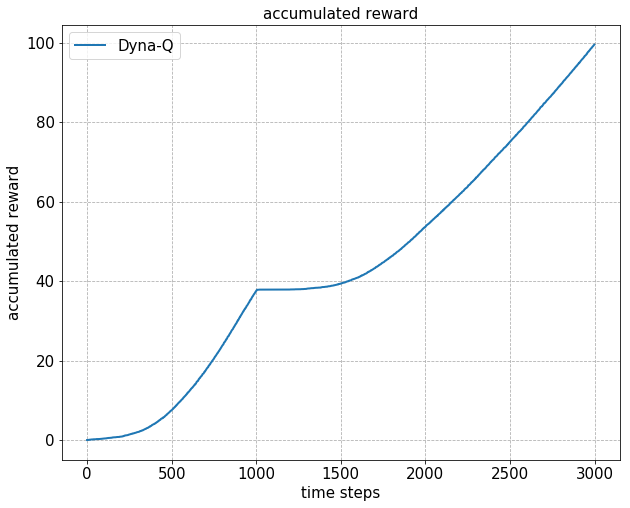

In [56]:
fig, ax = plt.subplots(figsize=(10,8))
fontsize = 15
ax.plot(range(3000), 
        acc_reward,
        linewidth=2,
        linestyle='-',
        label='Dyna-Q')
ax.grid(linestyle='--')
ax.legend(loc='best', fontsize=fontsize)
ax.set_xlabel('time steps', fontsize=fontsize)
ax.set_ylabel('accumulated reward', fontsize=fontsize)
ax.set_title('accumulated reward', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
plt.show()